In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset=pd.read_csv("C:\\Users\\hr\\Downloads\\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
#feature matric
X=dataset.iloc[:,2:4].values 
y=dataset.iloc[:, -1].values

In [6]:
X[0]

array([   19, 19000], dtype=int64)

In [7]:
y[0]

0

<Axes: ylabel='count'>

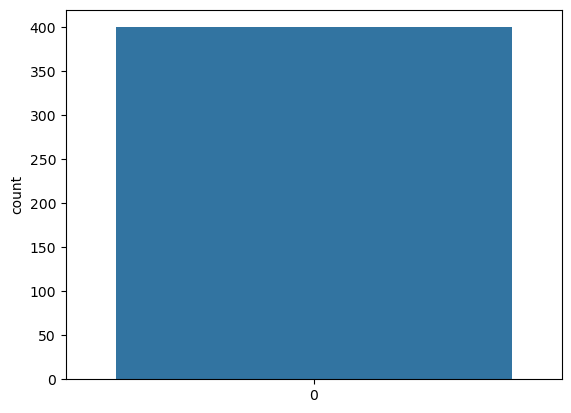

In [8]:
sns.countplot(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=0)


In [11]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
sc = StandardScaler() # Creating an object for StandardScaler
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Output X_train_scaled
#print(X_train_scaled)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
y_pred = classifier.predict(X_test)

0.9

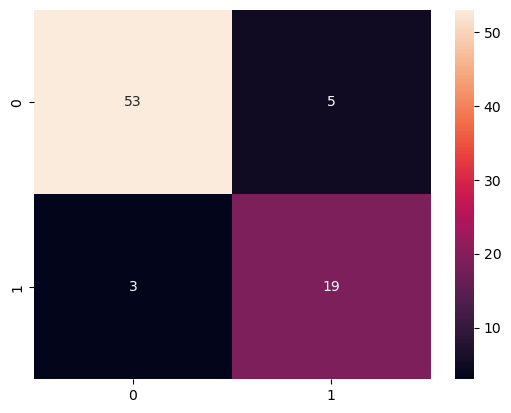

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
accuracy_score(y_test, y_pred)

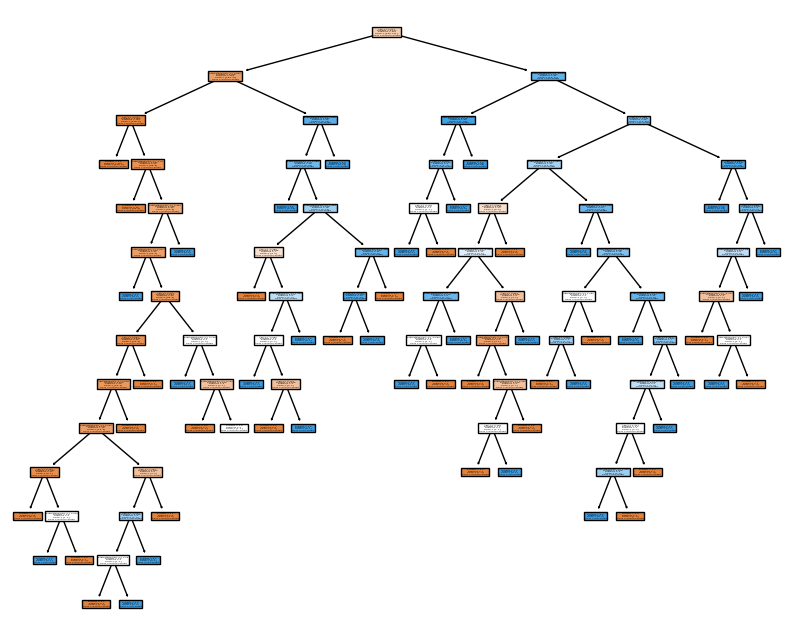

In [15]:
from sklearn.tree import plot_tree

# Create the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(classifier, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'])
plt.show()
